In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

<h2> Explatory Data Analysis <h2>

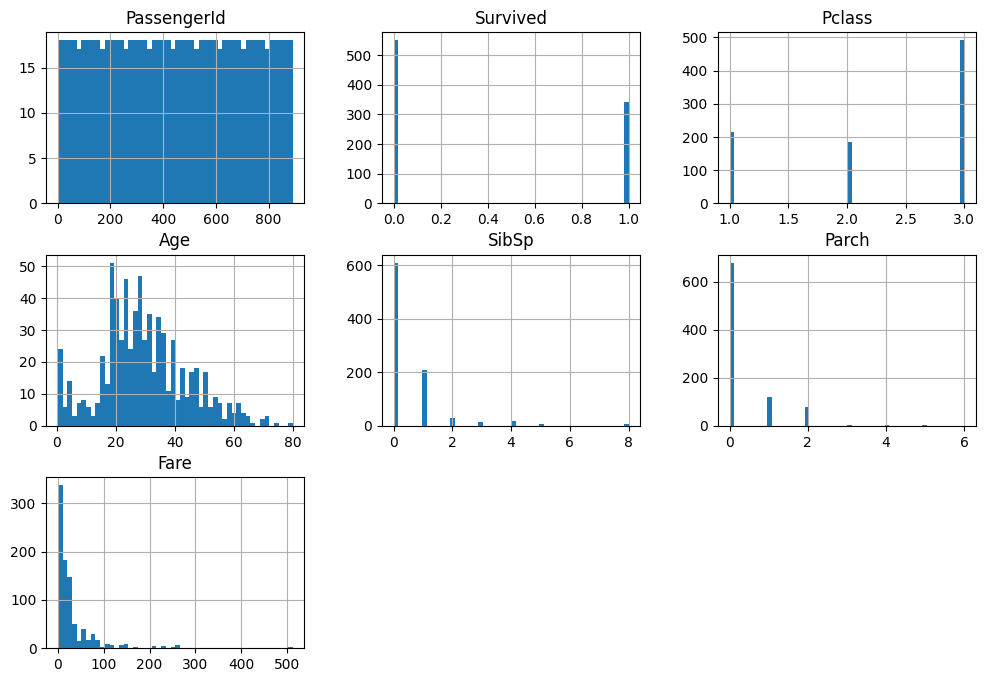

In [4]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(12,8))
plt.show()

<h3> Plot categorical features  <h3>

<class 'pandas.core.series.Series'>


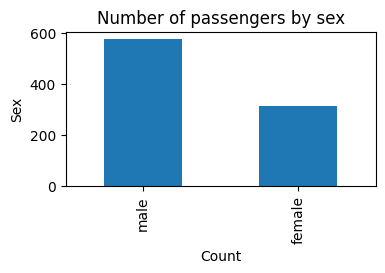

In [15]:
sex_counts =  df['Sex'].value_counts()
print(type(sex_counts)) #panda series
sex_counts.plot(kind='bar',title='Number of passengers by sex',figsize=(4,2))
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()

<h3> Drawing a scatter plot <h3>

/var/folders/h4/kdky5skx0jggltns31j4zj7r0000gn/T/ipykernel_11219/1127414259.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter =  plt.scatter(


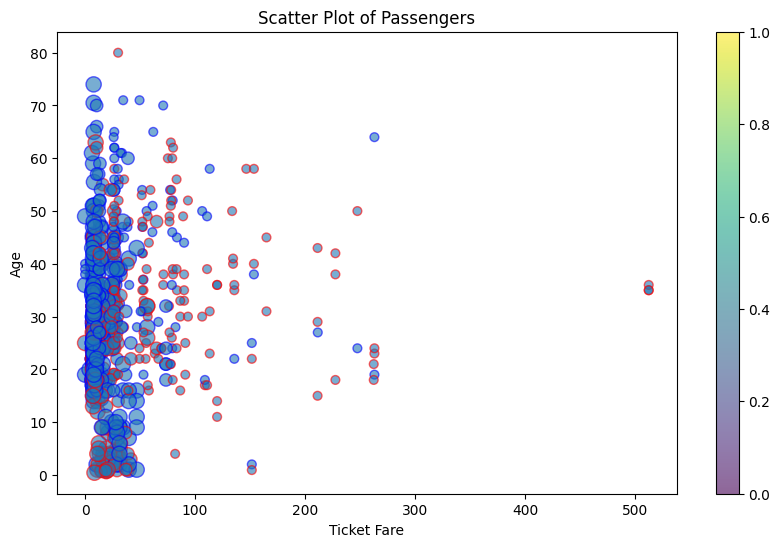

0.42


In [41]:
color_map = {0:'blue',1:'red'}
colors =  df['Survived'].map(color_map)
age_normalized = df['Age'] / df['Age'].max()
plt.figure(figsize=(10,6))

scatter =  plt.scatter(
    df['Fare'],
    df['Age'],
    s=(df['Pclass'])*40,
    cmap='viridis',
    alpha=0.6,
    edgecolors=colors,
)

plt.colorbar(scatter)
plt.title('Scatter Plot of Passengers')
plt.xlabel('Ticket Fare')
plt.ylabel('Age')
plt.show()
print(df['Age'].min())

<h3> Percentage of Dead Passengers by Age Group <h3>

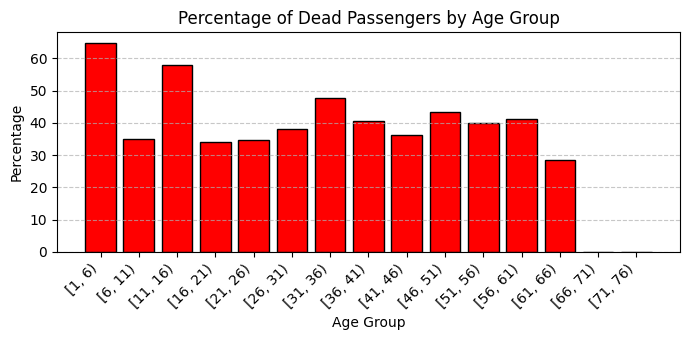

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create age bins (groups)
bins = np.arange(1, 81, 5)  # Age groups: [0.42-10, 10-20, 20-30, etc.]

# Create a new column for age groups based on bins
df['age_group'] = pd.cut(df['Age'], bins=bins, right=False)  # Right-exclusive intervals

# Filter only those who did NOT survive
dead_data = df[df['Survived'] == 1]
survived_data = df[df['Survived'] == 0]

# Count number of dead and survived passengers in each age group
dead_counts = dead_data['age_group'].value_counts().sort_index()
survived_counts = survived_data['age_group'].value_counts().sort_index()

# Calculate the percentage of dead people for each age group
percentage_dead = (dead_counts / (dead_counts + survived_counts)) * 100  # Avoid division errors

# Plot the percentage of dead people
plt.figure(figsize=(7, 3.5))
plt.bar(percentage_dead.index.astype(str), percentage_dead, color='red', edgecolor='black')
plt.title('Percentage of Dead Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.tight_layout()
plt.show()


<h3> Key insights <h3>


People aged between  one and six are more likely to die more than 60 percent people from this age group  died.

<h3> Correlations <h3>

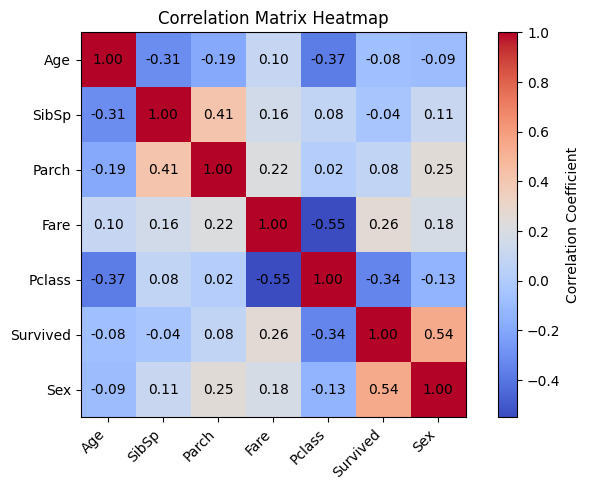

In [70]:
corr_df =df[['Age','SibSp','Parch','Fare','Pclass','Survived','Sex']]
corr_df.loc[:, 'Sex'] = corr_df['Sex'].map({'male': 0, 'female': 1})
corr_matrix = corr_df.corr()
plt.figure(figsize=(7, 5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')

plt.colorbar(label="Correlation Coefficient")
labels = corr_matrix.columns
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)), labels)
plt.title("Correlation Matrix Heatmap")

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", 
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()